In [58]:
# Early Detection of Diabetes – An EDA Approach
# ### Problem Statement
# Diabetes is a metabolic disease that causes high blood sugar. If left untreated, it can lead to serious complications like heart disease, kidney failure, and blindness. Early diagnosis and lifestyle adjustments can prevent or delay its onset.

# In this project, we will perform Exploratory Data Analysis (EDA) on a real-world dataset from the Pima Indian population, which contains health-related features of women over the age of 21. Our goal is to:

# Understand the data distribution and detect missing or incorrect values.
# Explore feature relationships with the outcome variable (diabetes or not).
# Identify trends or indicators that may help predict diabetes risk.
### Dataset Link
### Pima Indians Diabetes Dataset - Kaggle

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [60]:
df = pd.read_excel('diabetes.xlsx')

In [61]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [62]:
# Replacing seemingly null values with nan so we can replace later

col_zeros = ['Pregnancies',	'Glucose',	'BloodPressure',	'SkinThickness',	'Insulin',	'BMI',	'DiabetesPedigreeFunction',	'Age']

df[col_zeros] = df[col_zeros].replace(0, np.nan)


In [63]:
df.isnull().sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [64]:
# Filling missing valuse with median

for col in col_zeros:
    df[col] = df[col].fillna(df[col].median())

df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<BarContainer object of 2 artists>

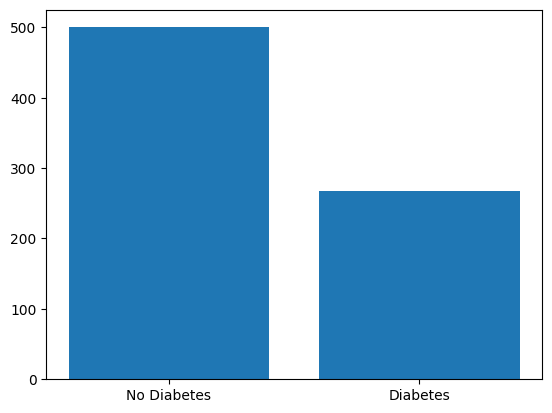

In [65]:
fig, ax = plt.subplots()

ax.bar(x=['No Diabetes','Diabetes'], height=df['Outcome'].value_counts())

<Axes: title={'center': 'Age distribution of patients'}, xlabel='Age', ylabel='Count'>

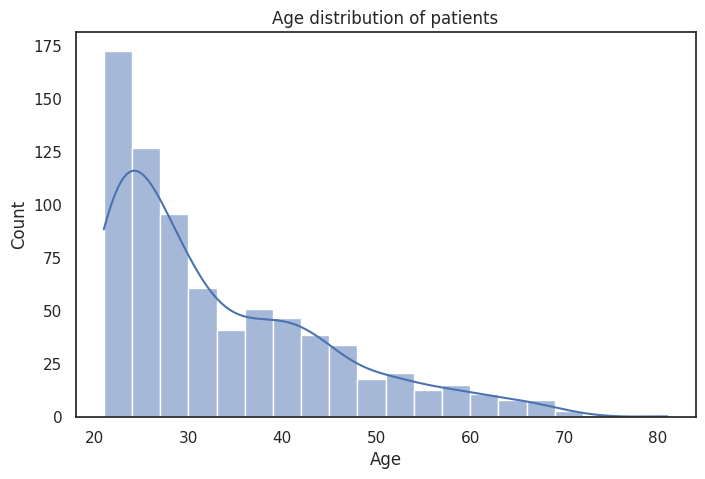

In [ ]:
# Age distribution of students

sns.set_theme(style='white')
plt.figure(figsize=(8,5))
plt.title('Age distribution of patients')
sns.histplot(x=df['Age'], bins=20,kde=True)  

<Axes: xlabel='BMI', ylabel='Count'>

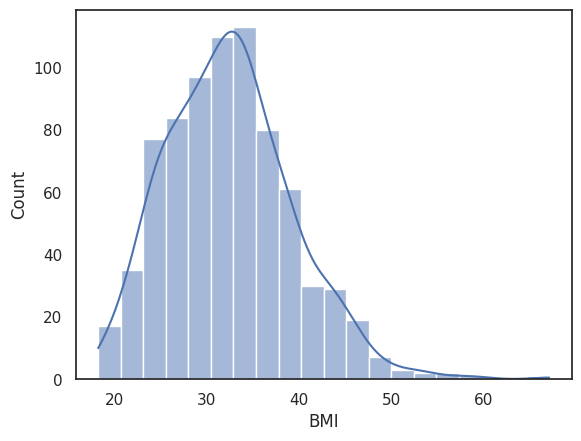

In [82]:
# BMI Distribution

sns.histplot(x=df['BMI'],bins=20, kde=True)

<Axes: title={'center': 'Glucose Level vs Diabetes Outcome'}, xlabel='Outcome', ylabel='Glucose'>

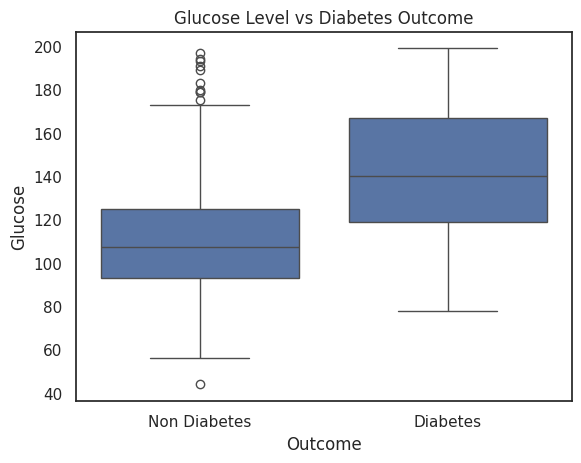

In [85]:
# Glucose levels for diabetic vs non diabetic patients
plt.title("Glucose Level vs Diabetes Outcome")
plt.xticks([0, 1], ['Non Diabetes', 'Diabetes'])
sns.boxplot(x=df['Outcome'], y=df['Glucose'])

<Axes: title={'center': 'Blood pressure vs Diabetes Outcome'}, xlabel='Outcome', ylabel='BloodPressure'>

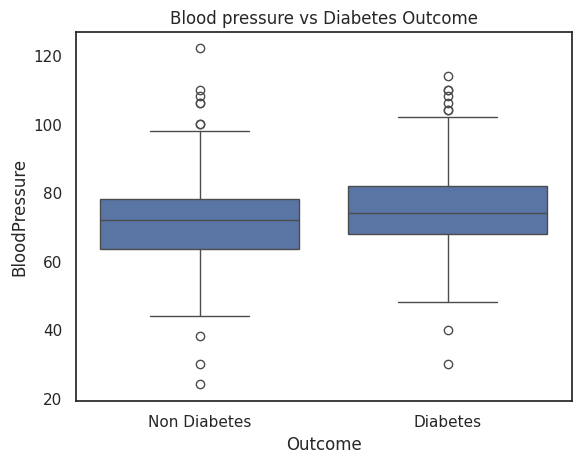

In [88]:
# Blood pressure levels for diabetic vs non diabetic patients

plt.title("Blood pressure vs Diabetes Outcome")
plt.xticks([0, 1], ['Non Diabetes', 'Diabetes'])
sns.boxplot(x=df['Outcome'], y=df['BloodPressure'])

<Axes: >

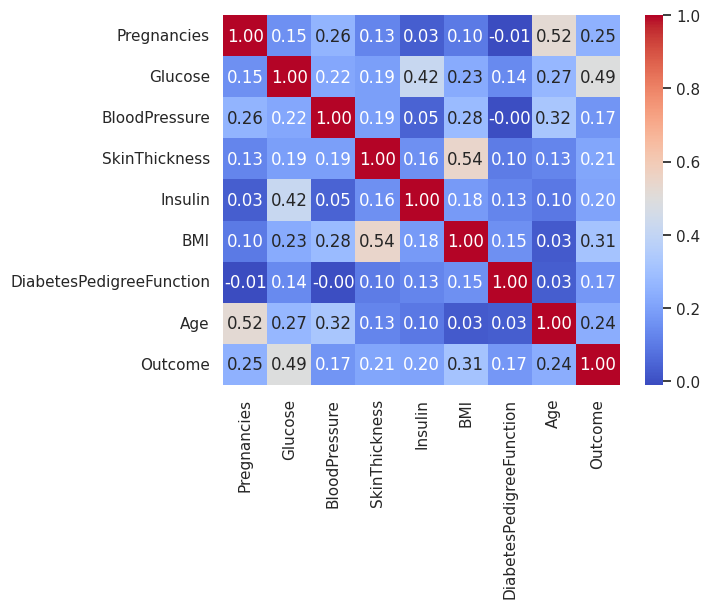

In [ ]:
# Correlation of each data with another

correlation = df.corr()
sns.heatmap(correlation,annot=True,cmap='coolwarm', fmt=".2f")

In [92]:
correlation

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.153525,0.255967,0.126082,0.032397,0.100870,-0.009198,0.522303,0.248172
Glucose,0.153525,1.000000,0.218937,0.192615,0.419451,0.231049,0.137327,0.266909,0.492782
BloodPressure,0.255967,0.218937,1.000000,0.191892,0.045363,0.281257,-0.002378,0.324915,0.165723
SkinThickness,0.126082,0.192615,0.191892,1.000000,0.155610,0.543205,0.102188,0.126107,0.214873
Insulin,0.032397,0.419451,0.045363,0.155610,1.000000,0.180241,0.126503,0.097101,0.203790
BMI,0.100870,0.231049,0.281257,0.543205,0.180241,1.000000,0.153438,0.025597,0.312038
DiabetesPedigreeFunction,-0.009198,0.137327,-0.002378,0.102188,0.126503,0.153438,1.000000,0.033561,0.173844
Age,0.522303,0.266909,0.324915,0.126107,0.097101,0.025597,0.033561,1.000000,0.238356
Outcome,0.248172,0.492782,0.165723,0.214873,0.203790,0.312038,0.173844,0.238356,1.000000


In [ ]:
# Dataset shows class imbalance.
# Diabetic individuals tend to be AGED with higher Glucose and BMI.
# Missing data in several columns (Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin BMI).
# Correlation heatmap highlights important features for predictive modeling.